# 모듈

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import re

from tqdm import tqdm

import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from torch.optim import Adam, AdamW, optimizer

from sklearn.model_selection import StratifiedKFold
from wordcloud import WordCloud

from collections import defaultdict, Counter
import konlpy

https://sosomemo.tistory.com/31 (mecab 설치)

In [ ]:
!apt-get update
!apt-get install g++ openjdk-8-jdk 
!pip3 install konlpy JPype1-py3
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

Get:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  Release
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease [18.1 kB]
Hit:6 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Get:7 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:8 http://archive.ubuntu.com/ubuntu focal InRelease
Get:9 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:10 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:11 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Get:12 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:14 http://ppa.launchpad.net/c2d4u.team/

In [ ]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 47.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.6/465.6 KB 39.8 MB/s eta 0:00:00


In [ ]:
!apt-get install fonts-nanum*
!apt-get install fontconfig

# EDA

## 데이터 불러오기

In [ ]:
train_data = pd.read_csv('/content/train_data.csv')
train_data

,index,title,topic_idx
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4
...,...,...,...
45649,45649,KB금융 미국 IB 스티펠과 제휴…선진국 시장 공략,1
45650,45650,1보 서울시교육청 신종코로나 확산에 개학 연기·휴업 검토,2
45651,45651,게시판 키움증권 2020 키움 영웅전 실전투자대회,1
45652,45652,답변하는 배기동 국립중앙박물관장,2


## 데이터 탐색

In [ ]:
titles = train_data['title']
topic_idx = train_data['topic_idx']

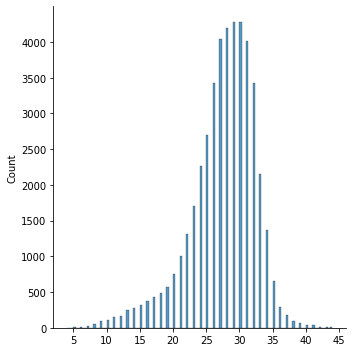

In [ ]:
# train data 문자열 길이
train_lengths = [len(t) for t in titles]
sns.displot(train_lengths)

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
from wordcloud import WordCloud

In [ ]:
from konlpy.tag import Mecab
mecab = Mecab()

In [ ]:
token_sentences = [mecab.morphs(text) for text in titles]
counter = Counter()
for title in token_sentences:
  counter.update(title)

In [ ]:
!apt-get install fontconfig

In [ ]:
!apt-get install fonts-nanum*

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
The following NEW packages will be installed:
  fonts-nanum fonts-nanum-coding fonts-nanum-eco fonts-nanum-extra
0 upgraded, 4 newly installed, 0 to remove and 30 not upgraded.
Need to get 37.6 MB of archives.
After this operation, 145 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum-extra all 20180306-3 [12.2 MB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum-coding all 2.5-2 [1,084 kB]
Get:4 http://archive.ubun

(-0.5, 399.5, 199.5, -0.5)

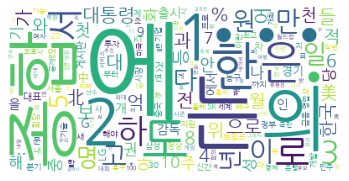

In [ ]:
# train data 단어분포
# 전체
FONT_PATH = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
wc = WordCloud(font_path = FONT_PATH,
                 background_color = "white")
cloud = wc.generate_from_frequencies(counter)
plt.imshow(cloud)
plt.axis('off')

//보충

https://dacon.io/competitions/official/235747/codeshare/3071?page=1&dtype=recent (단어 제거)
//
https://dacon.io/competitions/official/235747/codeshare/3050?page=1&dtype=recent (워드클라우드)

## 불필요한 단어 제거

In [ ]:
# 필요없는 단어 지우기
def word_delete(title):
    delete_word = [
        "1보",
        "2보",
        "3보",
        "4보",
        "5보",
        "속보",
        "사진",
        "게시판",
        "주말 N",
        "QA",
        "그래픽",
        "국내",
        "동정",
        "속보",
        "신간",
        "위클리",
        "주간 화제의 뉴스",
        "카드뉴스",
        "팩트체크",
    ]
    for i in delete_word:
        if title.endswith(i) or title.startswith(i):
            title = title.replace(i, "")
    if title.endswith("종합"):
        title = title[:-2]
    title = title.replace("↑", " 증가")
    title = title.replace("↓", " 감소")
    title = title.replace("→", "에서 ")
    title = title.replace("~", "에서 ")
    title = title.replace("...", ". ")
    title = title.replace("·", " 그리고 ")
    title = title.replace(":", " 대 ")
    title = title.upper()
    return title



In [ ]:
# 불필요한 텍스트 제거
def clean_text(title):
    title_clean = re.sub("[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z0-9\\s.%]", " ", title)
    title_clean = re.sub(" +", " ", title_clean)
    title_clean = title_clean.strip()
    return title_clean


def word_eda(title):
    title = word_delete(title)
    title = chinese_char(title)
    title = clean_text(title)
    return title

## 한자 변환

In [ ]:
def chinese_char(text):
    import re

    # 2단어 이상
    text = re.sub("外人", "외국사람", text)
    text = re.sub("詩人", "시인", text)
    text = re.sub("日人", "일본사람", text)
    if re.search(r"[0-9]人", text):
        text = re.sub("人", "명", text)
    text = re.sub("人", "사람", text)
    text = re.sub("中企", "중소기업", text)
    text = re.sub("令和", "", text)
    text = re.sub("不備", "준비 안되다.", text)
    text = re.sub("印尼", "인도네시아", text)
    text = re.sub("반反", "반대", text)
    text = re.sub("부富", "재산", text)
    text = re.sub("^書香萬里", "", text)
    text = re.sub("最古", "가장 오래된", text)
    text = re.sub("^社告", "", text)
    text = re.sub("對野", "야당", text)
    text = re.sub("氷魚", "", text)
    text = re.sub("眞朴", "박근혜와 친한", text)
    text = re.sub("非朴", "박근혜와 반대", text)
    text = re.sub("破七", "", text)
    text = re.sub("私黨", "개인의 당", text)
    text = re.sub("親朴", "박근혜와 친한", text)
    text = re.sub("邪敎", "사이비 종교", text)
    if re.search("[가-핳]銀", text):
        text = re.sub("銀", "은행", text)
    text = re.sub("非文", "문재인 반대", text)
    text = re.sub("四體", "", text)
    text = re.sub("潘風", "반기문 세력", text)
    text = re.sub("駐英", "영국 주재원", text)
    text = re.sub("高法", "고등법원", text)

    # 개별 단어
    text = re.sub("丁", "정세균", text)  # 사람의 성씨 지금은 정세균 국회의장 #3
    text = re.sub("七", "칠", text)  # 사람이름으로 사용됨 괄호 안에 #1
    text = re.sub("三", "삼", text)  # 3색으로 사용된 괄호 안에 #1
    text = re.sub("中", "중국", text)  # 중국 #771
    text = re.sub("乙", "을", text)  # 차선의 의미, 을말고 다른 단어를 사용하는 것이 좋아보임 #2
    text = re.sub("亞", "아시아", text)  # 23
    text = re.sub(
        "人", "명", text
    )  # 숫자人 : 명, 한글人 : 사람(국석기人), 外人 : 외국인, 詩人 : 시인, 日人 : 일본인 #13
    text = re.sub("仙", "선", text)  # 神仙 : 신선 #1
    text = re.sub("代", "대", text)  # 대를 잇다, 숫자代 : 10대
    text = re.sub("令", "령", text)  # 일본 연호 레이와(令和)에 사용 #1 # 명령에도 사용
    text = re.sub("企", "기", text)  # 中企 : 중소기업 으로 사용됨 모두 다 #14
    text = re.sub("伊", "이탈리아", text)  # 127
    text = re.sub("佛", "프랑스", text)  # 90
    text = re.sub("備", "비", text)  # 不備 : 불비, 갖추지않음
    text = re.sub("先", "먼저", text)  # 7
    text = re.sub("內", "안에", text)  # 지역內 : 어디안에 #1
    text = re.sub("全", "전체", text)  # 3
    text = re.sub("分", "당을 나누다.", text)  # 당을 나누다 #3 分黨: 분당
    text = re.sub("前", "이전", text)  # 이전 #94
    text = re.sub("北", "북한", text)  # 1293
    text = re.sub("千", "천정배", text)  # 국민의 당 천정배 #7
    text = re.sub("協", "협회", text)  # 화합할 협 #2
    text = re.sub("南", "한국", text)  # 36
    text = re.sub("印", "인도", text)  # 印尼 : 인도네시아 # 8(7,1)
    text = re.sub("反", "반대", text)  # 반反 -> 반(反)로 추정 #52
    text = re.sub("古", "오래된", text)  # 最古 -> 최고 # 1
    text = re.sub("史", "역사", text)  # 3
    text = re.sub("告", "고", text)  # 社告 -> 사고(회사광고) 맨 앞에 게시판 처럼 나옴 삭제필 # 2
    text = re.sub("和", "통합", text)  # 1개는 통합 나머지 하나는 令和(일본 연호) # 2
    text = re.sub("四", "4", text)  # 四體 -> 4가지 글씨체 # 1
    text = re.sub("在", "", text)  # 뭔의미인지 모르겠음 在伊 -> 뜻이 안나옴 # 1
    text = re.sub(
        "外", "외", text
    )  # 단독: ~외 몇건 삭제 필, 外人 : 외인 기사 맨앞(게시판)으로 사용 되거나 외국인으로 사용됨 삭제해도 무방할듯 # 24
    text = re.sub("大", "대학교", text)  # 大戰 : 대결, 大寒 : 절기 중 대한
    text = re.sub("妻", "부인", text)  # 1
    text = re.sub("委", "워원회", text)  # 7
    text = re.sub("子", "아들", text)  # 1
    text = re.sub("孫", "손학규", text)  # 손학규 # 14
    text = re.sub("安", "안철수", text)  # 안철수 # 61
    text = re.sub("家", "집안", text)  # 가문 주로 기업뒤에 붙어 사용 # 6
    text = re.sub("富", "재산", text)  # 재산 부富 -> 부(富) # 2
    text = re.sub("寒", "한", text)  # 절기 대한 # 1
    text = re.sub("對", "대결", text)  # 對野 대야 대야당 # 21
    text = re.sub("小", "", text)  # 작다 #1 삭제무방
    text = re.sub("尹", "윤석열", text)  # 윤석열 # 2
    text = re.sub("尼", "", text)  # 인도네시아 뒷 글자 # 2
    text = re.sub("展", "전시회", text)  # 19
    text = re.sub("山", "산", text)  # 1
    text = re.sub("島", "섬", text)  # 1
    text = re.sub("崔", "최순실", text)  # 최순실 # 4
    text = re.sub("州", "도시", text)  # 미국의 주, 시나 도시로 변경 # 4
    text = re.sub("巨", "큰", text)  # 巨野 거야(큰야당) 로 사용 # 2
    text = re.sub("市", "도시", text)  # 도시 # 1
    text = re.sub("式", "방식", text)  # 방법 # 1
    text = re.sub("弗", "달러", text)  # 돈, 달러 # 8
    text = re.sub("强", "강하다", text)  # 1
    text = re.sub("後", "뒤", text)  # 4
    text = re.sub("心", "마음", text)  # 4
    text = re.sub("情", "정", text)  # 1
    text = re.sub("惡", "악", text)  # 2
    text = re.sub("戰", "전투", text)  # 大戰로 사용됨 모두 # 2
    text = re.sub("政", "정부", text)  # 1
    text = re.sub("故", "", text)  # 죽은 사람 삭제해도 될듯 # 25
    text = re.sub("敎", "종교", text)  # 1
    text = re.sub("文", "문재인", text)  # 181
    text = re.sub("料", "요금", text)  # 1
    text = re.sub("新", "새로운", text)  # 17
    text = re.sub("日", "일본", text)  # 460
    text = re.sub("書", "서", text)  # 書香萬里 로 기사 제목 앞에 사용됨(게시판) # 2
    text = re.sub(
        "曺", "조국 법무부장관", text
    )  # 조국 # 11 조국이라는 이름이 나라라는 뜻이 있을 수 있어 다른 방법의 치환이 필요해 보임
    text = re.sub("最", "최", text)  # 最古 # 1
    text = re.sub("月", "한 달", text)  # 5
    text = re.sub("朴", "박근혜", text)  # 박근혜 # 659
    text = re.sub("株", "주식", text)  # 18
    text = re.sub("核", "핵폭탄", text)  # 3
    text = re.sub("案", "안건", text)  # 2
    text = re.sub("機", "기계", text)  # 1
    text = re.sub("檢", "검찰", text)  # 73
    text = re.sub("比", "대비", text)  # 12
    text = re.sub("氣", "기", text)  # 2
    text = re.sub("氷", "빙", text)  # 氷魚 삭제해도 될듯 # 1
    text = re.sub("江", "강", text)  # 1
    text = re.sub("法", "법", text)  # 7
    text = re.sub("洪", "홍경영", text)  # 정치인 # 2
    text = re.sub("海", "해", text)  # 西海 서해 # 1
    text = re.sub("港", "항구", text)  # 1
    text = re.sub("湖", "호수", text)  # 1
    text = re.sub("潘", "반기문", text)  # 8
    text = re.sub("無", "없다", text)  # 9
    text = re.sub("煎", "전", text)  # 花煎 화전 # 1 삭제
    text = re.sub("燈", "조명", text)  # 2
    text = re.sub("父", "아버지", text)  # 3
    text = re.sub("獨", "독일", text)  # 137
    text = re.sub("王", "왕", text)  # 1
    text = re.sub("現", "현재", text)  # 1
    text = re.sub("生", "삶", text)  # 1
    text = re.sub("申", "신", text)  # 2 # 삭제도 가능
    text = re.sub("男", "남자", text)  # 11
    text = re.sub("發", "발생", text)  # 7
    text = re.sub("百", "백화점", text)  # 6
    text = re.sub("眞", "진", text)  # 眞朴 : 박근혜와 친한, 非朴 # 박근혜 반대 # 2
    text = re.sub("知", "", text)  # 1 # 삭제
    text = re.sub("破", "포", text)  # 破七 사람이름 삭제 # 1
    text = re.sub("硏", "연구소", text)  # 27
    text = re.sub("社", "회사", text)  # 社告 는 삭제 # 5
    text = re.sub("神", "신", text)  # 神仙 # 1
    text = re.sub("禹", "우병우", text)  # 정치인 11
    text = re.sub("私", "사", text)  # 사적인 私黨: 사당 개인의 당 # 1
    text = re.sub("秋", "추미애", text)  # 정치인 # 9
    text = re.sub("稅", "세금", text)  # 1
    text = re.sub("空", "공", text)  # 空約 공약 # 1
    text = re.sub("童", "동", text)  # 아이 童心 동심 # 1
    text = re.sub("約", "약", text)  # 空約 공약 # 1
    text = re.sub("美", "미국", text)  # 1467
    text = re.sub("脫", "벗어난", text)  # 탈 # 3
    text = re.sub("臺", "대만", text)  # 1
    text = re.sub("與", "여당", text)  # 290
    text = re.sub("舊", "구", text)  # 예전 # 1
    text = re.sub("色", "색", text)  # 5
    text = re.sub("花", "화", text)  # 삭제 화전
    text = re.sub("英", "영국", text)  # 283
    text = re.sub("茶", "차", text)  # 삭제 # 1
    text = re.sub("萬", "만", text)  # 書香萬里 삭제
    text = re.sub("號", "팀", text)  # 12
    text = re.sub("行", "행", text)  # 삭제도 가능 할 듯 # 44
    text = re.sub("西", "서", text)  # 西海 서해 1
    text = re.sub("親", "친한", text)  # 親朴 친박 친한 박근혜 # 13
    text = re.sub("詩", "시", text)  # 시조 도 좋을 듯 # 14
    text = re.sub("誌", "지", text)  # 1
    text = re.sub("說", "가설", text)  # 1
    text = re.sub("論", "논의", text)  # 2
    text = re.sub("證", "증권", text)  # 7
    text = re.sub("賞", "상", text)  # 1
    text = re.sub("趙", "조윤선", text)  # 정치인 # 1
    text = re.sub("車", "자동차", text)  # 14
    text = re.sub("軍", "군대", text)  # 69
    text = re.sub("通", "통화", text)  # 1
    text = re.sub("道", "도로", text)  # 1
    text = re.sub("選", "선별", text)  #  1
    text = re.sub("邪", "사", text)  # 邪敎 사이비 종교
    text = re.sub("鄭", "정진석", text)  # 정치인 # 1
    text = re.sub("酒", "주", text)  # 삭제 # 1
    text = re.sub("醫", "의사 협회", text)  # 1
    text = re.sub("里", "리", text)  # 書香萬里 삭제 # 2
    text = re.sub("重", "중공업", text)  # 18
    text = re.sub("野", "야당", text)  # 180
    text = re.sub("金", "김정은", text)  # 북한 머리 # 12
    text = re.sub("銀", "은메달", text)  # 18 # 은행 하나銀, 은메달 銀
    text = re.sub("銅", "동메달", text)  # 2
    text = re.sub("阿", "아시아", text)  # 2
    text = re.sub("院", "구성원", text)  # 2
    text = re.sub("靑", "청와대", text)  # 377
    text = re.sub("非", "아닌", text)  # 非文 : 문제인 반대, 非朴 : 박근혜 반대
    text = re.sub("韓", "한국", text)  # 109
    text = re.sub("風", "세력", text)  # 潘風 : 반기문 세력, # 6
    text = re.sub("香", "", text)  # 書香萬里 삭제 # 2
    text = re.sub("駐", "주재원", text)  # 駐英 : 영국 주재원 # 8
    text = re.sub("體", "체", text)  # 四體 삭제 # 1
    text = re.sub("高", "높은", text)  # 高法 : 고등법원 # 3
    text = re.sub("魚", "어", text)  # 빙어 삭제 # 1
    text = re.sub("黃", "황교안", text)  # 정치인 # 16
    text = re.sub("黨", "정당", text)  # 13
    return text


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_df = train_data.copy()
train_df["title"] = train_df["title"].apply(word_eda)
train_df

,index,title,topic_idx
0,0,인천에서 핀란드 항공기 결항 휴가철 여행객 분통,4
1,1,실리콘밸리 넘어서겠다 구글 15조원 들여 미국전역 거점화,4
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4
3,3,NYT 클린턴 측근한국기업 특수관계 조명 공과 사 맞물려,4
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4
...,...,...,...
45649,45649,KB금융 미국 IB 스티펠과 제휴 선진국 시장 공략,1
45650,45650,서울시교육청 신종코로나 확산에 개학 연기 그리고 휴업 검토,2
45651,45651,키움증권 2020 키움 영웅전 실전투자대회,1
45652,45652,답변하는 배기동 국립중앙박물관장,2
